In [51]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
import geopandas as gpd

file1 = 'IHFC_2021_GHFDB.csv'
file2 = 'IHFC_2021_GHFDB.xlsx'

base = Path(os.getcwd()) / 'data'

df = pd.read_csv(base / file1, encoding='ISO-8859–1', on_bad_lines='skip', sep=';')
df = df[['q', 'lat', 'lng']]

C:\Users\s2216495\AppData\Local\Temp/ipykernel_364/3447606518.py:14: DtypeWarning: Columns (5,6,8,9,10,11,12,14,17,21,24,25,26,27,28,29,30,31,32,33,34,35,36,41,42,43,44,45,46,48,51,52,53,54,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(base / file1, encoding='ISO-8859–1', on_bad_lines='skip', sep=';')


In [52]:
import re

def clean_heatflow_data(df):
    '''
    !!! 
    Taylored to the error present in the heatflow dataset
    https://ihfc-iugg.org/products/global-heat-flow-database/data 
    !!!

    Iterates over rows, ensures lon lat data is float

    Args:
        df(pd.DataFrame): data of heatflow, expects columns 'q', 'lng', 'lat' 

    '''
    for col in ['lng', 'lat']:

        keepmask = pd.Series([True for _ in range(len(df))], index=df.index)

        for i, row in df.iterrows():
            if not isinstance(row[col], float):

                coord = re.sub(r'[^0-9.]', '', row[col])

                try:
                    coord = float(coord)
                    df.at[i, col] = coord
                except ValueError:
                    keepmask.at[i] = False


        df = df.loc[keepmask]

    df = df.loc[df['q'] < 100]
    df = df.loc[df['q'] > 0]

    return df
    
df = clean_heatflow_data(df)

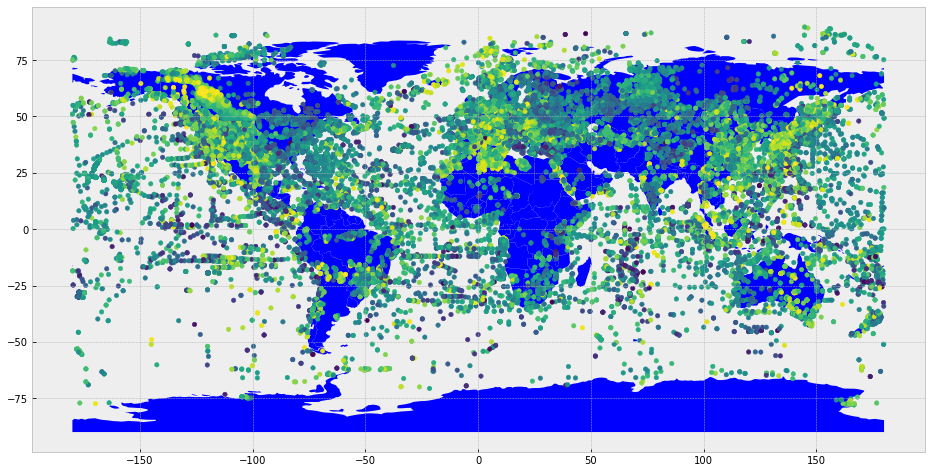

In [61]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat))
fig, ax = plt.subplots(1, 1, figsize=(16, 13))
world.plot(ax=ax)
gdf.plot(ax=ax, column='q', s=20)
# ax.set_xlim(0, 20)
# ax.set_ylim(25, 45)


plt.show()

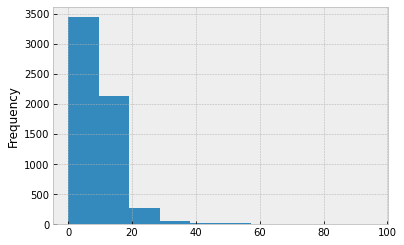

In [46]:
gdf.q.plot.hist()

In [57]:
d = {'url': 'youtube.com',
     'b': 'x'}